In [23]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('police_project.csv')
print('Data loaded')

Data loaded


In [8]:
#first 5 rows of the df
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [10]:
#data types of columns
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [11]:
#convert the stop_date and stop_time columns into datetime format (from objetc to date and time  format)
df['stop_time'] = pd.to_datetime(df.stop_time)
df['stop_date'] = pd.to_datetime(df.stop_date)

In [12]:
#check again the type of those columns
df.dtypes # stop_date and stop_time are now datetime64 format

stop_date             datetime64[ns]
stop_time             datetime64[ns]
county_name                  float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
dtype: object

In [ ]:
# search conducted for each age group for Male Female
pd.pivot_table(df,index = ['driver_gender','violation'])

#### min, max, average age of male and female for each violation and how many cases for each age on the basis of violation

In [18]:
pd.pivot_table(df,index=['driver_gender','violation'],values=['driver_age'],aggfunc=[np.mean,np.max,np.min,len])

mean       amax       amin        len
                                  driver_age driver_age driver_age driver_age
driver_gender violation                                                      
F             Equipment            31.521739       89.0       16.0       2487
              Moving violation     33.954930       99.0       15.0       3204
              Other                33.969343       74.0       16.0        690
              Registration/plates  32.850791       72.0       16.0       1013
              Seat belt            30.124409       71.0       17.0        635
              Speeding             32.529023       84.0       16.0      15482
M             Equipment            31.857210       85.0       16.0       8533
              Moving violation     36.653404       94.0       15.0      13020
              Other                40.620631       87.0       16.0       3627
              Registration/plates  32.783023       74.0       16.0       2419
              Seat belt            32.776867       77.0       17.0       2317
              Speeding             34.000729       90.0       15.0      32979

### How many people were arrested on each date

In [20]:
df.groupby('stop_date').is_arrested.value_counts()

stop_date   is_arrested
2005-01-02  False           1
2005-01-18  False           1
2005-01-23  False           1
2005-02-20  True            1
2005-03-14  False           1
                           ..
2015-12-28  False          20
2015-12-29  False          12
2015-12-30  False          21
            True            1
2015-12-31  False          24
Name: is_arrested, Length: 5681, dtype: int64

### on which time police is more active 

In [21]:
df['stop_time'].mean()

Timestamp('2023-04-13 12:08:17.488363776')

### How many males and female drivers

In [22]:
df['driver_gender'].value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

<AxesSubplot:>

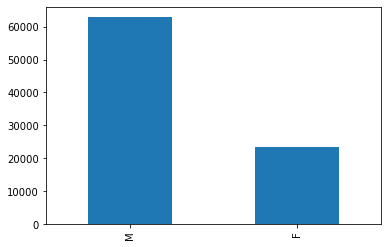

In [24]:
df.driver_gender.value_counts().plot.bar()

#### find average, min, amax age for male and female drivers

In [25]:
df.groupby('driver_gender').driver_age.agg(['min','max','mean'])

,min,max,mean
driver_gender,,,
F,15.0,99.0,32.607399
M,15.0,94.0,34.537886


In [26]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,2023-04-13 01:55:00,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,2023-04-13 08:15:00,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,2023-04-13 23:15:00,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,2023-04-13 17:15:00,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,2023-04-13 10:00:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### check drug activity for both male and female

In [28]:
drug_data = pd.DataFrame(df.groupby('driver_gender').drugs_related_stop.value_counts())
drug_data

drugs_related_stop
driver_gender drugs_related_stop                    
F             False                            23415
              True                                96
M             False                            62176
              True                               719

### Extract true cases for male and female

In [29]:
df.groupby('driver_gender').drugs_related_stop.sum()

driver_gender
F     96
M    719
Name: drugs_related_stop, dtype: int64

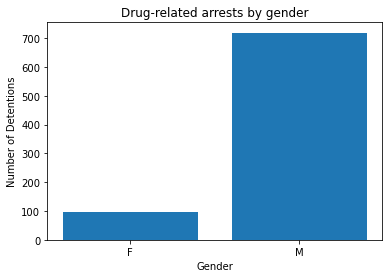

In [30]:
# graph the result
gender = ['F','M']
detentions = [96, 719]

#the graph
plt.bar(gender, detentions)

#labels
plt.xlabel('Gender')
plt.ylabel('Number of Detentions')
plt.title('Drug-related arrests by gender')

plt.show()

### total cases for true and false for drugs_related_stop

In [31]:
df['drugs_related_stop'].value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

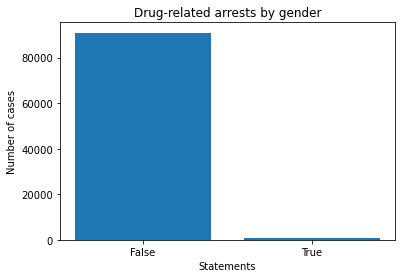

In [32]:
# graph the result
statements = ['False','True']
cases = [90929, 815]

#the graph
plt.bar(statements, cases)

#labels
plt.xlabel('Statements')
plt.ylabel('Number of cases')
plt.title('Drug-related arrests by gender')

plt.show()

### waht type of action is taken by police for each date

In [33]:
df.groupby('stop_date').stop_outcome.value_counts()

stop_date   stop_outcome    
2005-01-02  Citation             1
2005-01-18  Citation             1
2005-01-23  Citation             1
2005-02-20  Arrest Driver        1
2005-03-14  Citation             1
                                ..
2015-12-30  N/D                  2
            Arrest Passenger     1
2015-12-31  Citation            16
            Warning              7
            No Action            1
Name: stop_outcome, Length: 8970, dtype: int64

### How many times police has given warning as stop outcome

In [39]:
warning_data = df[df['stop_outcome']=='Warning']
warning_data

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
99,2005-10-03,2023-04-13 08:37:00,NaN,M,1965.0,40.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
108,2005-10-03,2023-04-13 17:00:00,NaN,M,1961.0,44.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,30+ Min,False
168,2005-10-06,2023-04-13 06:30:00,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
260,2005-10-09,2023-04-13 16:00:00,NaN,F,1978.0,27.0,Black,Registration Violation,Registration/plates,False,NaN,Warning,False,0-15 Min,False
281,2005-10-10,2023-04-13 12:05:00,NaN,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91730,2015-12-31,2023-04-13 15:36:00,NaN,F,1996.0,19.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91732,2015-12-31,2023-04-13 19:44:00,NaN,F,1969.0,46.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91736,2015-12-31,2023-04-13 20:27:00,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,2023-04-13 20:35:00,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False


In [41]:
warning_data = len(df[df['stop_outcome']=='Warning'])
warning_data #total of values

5294

### warning cases for male and female

In [44]:
df.groupby('driver_gender').stop_outcome.value_counts()

driver_gender  stop_outcome    
F              Citation            21088
               Warning              1514
               Arrest Driver         468
               No Action             186
               Arrest Passenger      128
               N/D                   127
M              Citation            55917
               Warning              3779
               Arrest Driver        2103
               N/D                   463
               No Action             403
               Arrest Passenger      230
Name: stop_outcome, dtype: int64

### How many male and femal for each violation


In [48]:
pd.crosstab(df['driver_gender'],df['violation'])

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2487,3204,690,1013,635,15482
M,8533,13020,3627,2419,2317,32979


In [49]:
pd.crosstab(df['driver_gender'],df['violation'],margins=True)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,All
driver_gender,,,,,,,
F,2487,3204,690,1013,635,15482,23511
M,8533,13020,3627,2419,2317,32979,62895
All,11020,16224,4317,3432,2952,48461,86406


### data distribution visualization for driver_age

<AxesSubplot:>

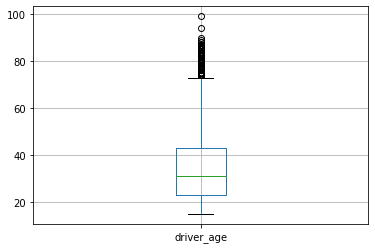

In [54]:
df.boxplot('driver_age')